## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import energyefficiencyDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              920.3
Date:                Sun, 24 Jul 2022   Prob (F-statistic):                   2.40e-318
Time:                        16:01:10   Log-Likelihood:                         -119.39
No. Observations:                 614   AIC:                                      252.8
Df Residuals:                     607   BIC:                                      283.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


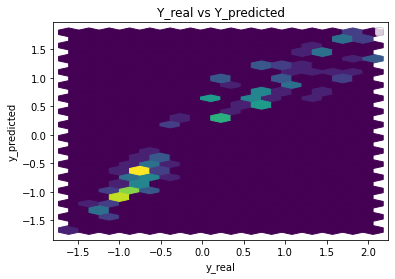

Performance Metrics
Mean Squared Error: 0.07412533339174529
Mean Absolute Error: 0.1933551988798214
Manhattan distance: 29.776700627492477
Euclidean distance: 3.3786537766289073


Stats Model MAE 0.1933551988798214


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.037906
0:	learn: 0.9717742	total: 56.5ms	remaining: 56.5s
1:	learn: 0.9395557	total: 56.8ms	remaining: 28.3s
2:	learn: 0.9122111	total: 57.7ms	remaining: 19.2s


3:	learn: 0.8813826	total: 59.8ms	remaining: 14.9s
4:	learn: 0.8563384	total: 65.9ms	remaining: 13.1s
5:	learn: 0.8283440	total: 67.2ms	remaining: 11.1s
6:	learn: 0.8056387	total: 67.4ms	remaining: 9.56s
7:	learn: 0.7825705	total: 67.8ms	remaining: 8.4s
8:	learn: 0.7564753	total: 70.1ms	remaining: 7.72s
9:	learn: 0.7324037	total: 70.5ms	remaining: 6.98s
10:	learn: 0.7095290	total: 72.4ms	remaining: 6.51s
11:	learn: 0.6866581	total: 73ms	remaining: 6.01s
12:	learn: 0.6681005	total: 74ms	remaining: 5.62s
13:	learn: 0.6493569	total: 78.4ms	remaining: 5.52s
14:	learn: 0.6291019	total: 78.6ms	remaining: 5.16s
15:	learn: 0.6107755	total: 78.9ms	remaining: 4.85s
16:	learn: 0.5917278	total: 79.1ms	remaining: 4.57s
17:	learn: 0.5747782	total: 79.3ms	remaining: 4.33s
18:	learn: 0.5580336	total: 79.5ms	remaining: 4.11s
19:	learn: 0.5446752	total: 79.6ms	remaining: 3.9s
20:	learn: 0.5274274	total: 79.9ms	remaining: 3.73s
21:	learn: 0.5109990	total: 82.2ms	remaining: 3.65s


22:	learn: 0.4957595	total: 83.5ms	remaining: 3.54s
23:	learn: 0.4805704	total: 86.7ms	remaining: 3.52s
24:	learn: 0.4650816	total: 87.2ms	remaining: 3.4s
25:	learn: 0.4509069	total: 87.7ms	remaining: 3.29s
26:	learn: 0.4377599	total: 91.6ms	remaining: 3.3s
27:	learn: 0.4254545	total: 93.7ms	remaining: 3.25s
28:	learn: 0.4132944	total: 94.3ms	remaining: 3.16s
29:	learn: 0.4006274	total: 96ms	remaining: 3.1s
30:	learn: 0.3907824	total: 96.9ms	remaining: 3.03s
31:	learn: 0.3793525	total: 97.9ms	remaining: 2.96s
32:	learn: 0.3704873	total: 99.1ms	remaining: 2.9s
33:	learn: 0.3601058	total: 102ms	remaining: 2.89s
34:	learn: 0.3500064	total: 102ms	remaining: 2.81s
35:	learn: 0.3405148	total: 114ms	remaining: 3.05s
36:	learn: 0.3313468	total: 115ms	remaining: 2.99s
37:	learn: 0.3211343	total: 117ms	remaining: 2.96s
38:	learn: 0.3117988	total: 119ms	remaining: 2.93s
39:	learn: 0.3041597	total: 120ms	remaining: 2.88s
40:	learn: 0.2949430	total: 121ms	remaining: 2.84s
41:	learn: 0.2879811	total

45:	learn: 0.2603510	total: 135ms	remaining: 2.79s
46:	learn: 0.2530043	total: 136ms	remaining: 2.77s
47:	learn: 0.2467441	total: 140ms	remaining: 2.77s
48:	learn: 0.2411088	total: 141ms	remaining: 2.73s
49:	learn: 0.2348329	total: 142ms	remaining: 2.71s
50:	learn: 0.2293709	total: 145ms	remaining: 2.69s
51:	learn: 0.2236358	total: 145ms	remaining: 2.65s
52:	learn: 0.2178126	total: 148ms	remaining: 2.65s
53:	learn: 0.2121092	total: 150ms	remaining: 2.63s
54:	learn: 0.2061011	total: 152ms	remaining: 2.6s
55:	learn: 0.2006245	total: 152ms	remaining: 2.56s
56:	learn: 0.1951139	total: 152ms	remaining: 2.52s
57:	learn: 0.1902162	total: 154ms	remaining: 2.51s
58:	learn: 0.1865231	total: 162ms	remaining: 2.58s


59:	learn: 0.1835135	total: 211ms	remaining: 3.3s
60:	learn: 0.1791006	total: 212ms	remaining: 3.27s
61:	learn: 0.1757036	total: 214ms	remaining: 3.23s
62:	learn: 0.1711261	total: 215ms	remaining: 3.2s
63:	learn: 0.1687299	total: 216ms	remaining: 3.15s
64:	learn: 0.1654561	total: 217ms	remaining: 3.13s
65:	learn: 0.1622009	total: 221ms	remaining: 3.13s
66:	learn: 0.1599803	total: 222ms	remaining: 3.09s
67:	learn: 0.1564511	total: 223ms	remaining: 3.05s
68:	learn: 0.1526882	total: 224ms	remaining: 3.02s


69:	learn: 0.1492396	total: 227ms	remaining: 3.01s
70:	learn: 0.1454386	total: 229ms	remaining: 3s
71:	learn: 0.1432307	total: 231ms	remaining: 2.98s
72:	learn: 0.1402670	total: 232ms	remaining: 2.95s
73:	learn: 0.1369674	total: 233ms	remaining: 2.91s
74:	learn: 0.1334996	total: 233ms	remaining: 2.88s
75:	learn: 0.1306797	total: 234ms	remaining: 2.85s
76:	learn: 0.1276804	total: 236ms	remaining: 2.82s
77:	learn: 0.1250142	total: 236ms	remaining: 2.79s
78:	learn: 0.1222941	total: 236ms	remaining: 2.75s
79:	learn: 0.1196720	total: 237ms	remaining: 2.72s
80:	learn: 0.1178344	total: 237ms	remaining: 2.69s
81:	learn: 0.1156116	total: 238ms	remaining: 2.66s
82:	learn: 0.1128848	total: 238ms	remaining: 2.63s
83:	learn: 0.1115101	total: 238ms	remaining: 2.6s
84:	learn: 0.1091865	total: 241ms	remaining: 2.59s
85:	learn: 0.1067044	total: 242ms	remaining: 2.57s
86:	learn: 0.1043568	total: 242ms	remaining: 2.54s
87:	learn: 0.1029961	total: 243ms	remaining: 2.52s
88:	learn: 0.1008390	total: 244ms	r

110:	learn: 0.0725255	total: 276ms	remaining: 2.21s
111:	learn: 0.0719704	total: 276ms	remaining: 2.19s
112:	learn: 0.0712122	total: 277ms	remaining: 2.17s
113:	learn: 0.0701291	total: 277ms	remaining: 2.15s
114:	learn: 0.0690919	total: 277ms	remaining: 2.13s
115:	learn: 0.0683117	total: 278ms	remaining: 2.12s
116:	learn: 0.0673897	total: 279ms	remaining: 2.1s
117:	learn: 0.0664277	total: 282ms	remaining: 2.11s
118:	learn: 0.0654944	total: 284ms	remaining: 2.1s
119:	learn: 0.0646544	total: 288ms	remaining: 2.11s
120:	learn: 0.0637179	total: 289ms	remaining: 2.1s
121:	learn: 0.0628949	total: 290ms	remaining: 2.08s
122:	learn: 0.0625365	total: 290ms	remaining: 2.07s
123:	learn: 0.0618387	total: 290ms	remaining: 2.05s
124:	learn: 0.0612708	total: 291ms	remaining: 2.03s
125:	learn: 0.0605638	total: 291ms	remaining: 2.02s
126:	learn: 0.0599266	total: 292ms	remaining: 2.01s
127:	learn: 0.0597581	total: 292ms	remaining: 1.99s
128:	learn: 0.0593616	total: 293ms	remaining: 1.98s
129:	learn: 0.0

146:	learn: 0.0521237	total: 319ms	remaining: 1.85s
147:	learn: 0.0519014	total: 324ms	remaining: 1.87s
148:	learn: 0.0515708	total: 325ms	remaining: 1.85s
149:	learn: 0.0512318	total: 329ms	remaining: 1.86s
150:	learn: 0.0508636	total: 329ms	remaining: 1.85s
151:	learn: 0.0506542	total: 329ms	remaining: 1.84s
152:	learn: 0.0504953	total: 329ms	remaining: 1.82s
153:	learn: 0.0502011	total: 330ms	remaining: 1.81s


154:	learn: 0.0500147	total: 341ms	remaining: 1.86s
155:	learn: 0.0497174	total: 341ms	remaining: 1.85s
156:	learn: 0.0494910	total: 343ms	remaining: 1.84s
157:	learn: 0.0492646	total: 344ms	remaining: 1.83s
158:	learn: 0.0490610	total: 344ms	remaining: 1.82s
159:	learn: 0.0488823	total: 344ms	remaining: 1.81s
160:	learn: 0.0486529	total: 345ms	remaining: 1.8s
161:	learn: 0.0484437	total: 345ms	remaining: 1.78s
162:	learn: 0.0482722	total: 345ms	remaining: 1.77s
163:	learn: 0.0480170	total: 346ms	remaining: 1.76s
164:	learn: 0.0478814	total: 346ms	remaining: 1.75s
165:	learn: 0.0477730	total: 354ms	remaining: 1.78s
166:	learn: 0.0475942	total: 355ms	remaining: 1.77s
167:	learn: 0.0474043	total: 355ms	remaining: 1.76s
168:	learn: 0.0472696	total: 355ms	remaining: 1.75s
169:	learn: 0.0470854	total: 355ms	remaining: 1.74s
170:	learn: 0.0468311	total: 356ms	remaining: 1.73s
171:	learn: 0.0466694	total: 357ms	remaining: 1.72s
172:	learn: 0.0464877	total: 357ms	remaining: 1.71s
173:	learn: 0

192:	learn: 0.0434120	total: 388ms	remaining: 1.62s
193:	learn: 0.0432524	total: 388ms	remaining: 1.61s
194:	learn: 0.0431563	total: 392ms	remaining: 1.62s
195:	learn: 0.0428917	total: 395ms	remaining: 1.62s
196:	learn: 0.0426970	total: 395ms	remaining: 1.61s
197:	learn: 0.0425666	total: 396ms	remaining: 1.6s
198:	learn: 0.0424076	total: 396ms	remaining: 1.59s
199:	learn: 0.0422503	total: 400ms	remaining: 1.6s
200:	learn: 0.0420577	total: 402ms	remaining: 1.6s
201:	learn: 0.0419662	total: 404ms	remaining: 1.6s
202:	learn: 0.0417862	total: 405ms	remaining: 1.59s
203:	learn: 0.0416562	total: 406ms	remaining: 1.58s
204:	learn: 0.0414127	total: 406ms	remaining: 1.57s
205:	learn: 0.0413250	total: 406ms	remaining: 1.56s
206:	learn: 0.0412034	total: 407ms	remaining: 1.56s
207:	learn: 0.0411210	total: 410ms	remaining: 1.56s
208:	learn: 0.0410006	total: 411ms	remaining: 1.55s
209:	learn: 0.0408980	total: 413ms	remaining: 1.55s
210:	learn: 0.0408189	total: 413ms	remaining: 1.55s
211:	learn: 0.04

229:	learn: 0.0387130	total: 442ms	remaining: 1.48s
230:	learn: 0.0385956	total: 443ms	remaining: 1.47s
231:	learn: 0.0384843	total: 445ms	remaining: 1.47s
232:	learn: 0.0383617	total: 446ms	remaining: 1.47s
233:	learn: 0.0381996	total: 447ms	remaining: 1.46s
234:	learn: 0.0381183	total: 448ms	remaining: 1.46s
235:	learn: 0.0379182	total: 449ms	remaining: 1.45s
236:	learn: 0.0378192	total: 450ms	remaining: 1.45s
237:	learn: 0.0377140	total: 452ms	remaining: 1.45s
238:	learn: 0.0376270	total: 453ms	remaining: 1.44s
239:	learn: 0.0375292	total: 455ms	remaining: 1.44s
240:	learn: 0.0373844	total: 455ms	remaining: 1.43s
241:	learn: 0.0371801	total: 457ms	remaining: 1.43s
242:	learn: 0.0370861	total: 458ms	remaining: 1.43s
243:	learn: 0.0369937	total: 459ms	remaining: 1.42s


244:	learn: 0.0367957	total: 460ms	remaining: 1.42s
245:	learn: 0.0367257	total: 480ms	remaining: 1.47s
246:	learn: 0.0366216	total: 482ms	remaining: 1.47s
247:	learn: 0.0364316	total: 482ms	remaining: 1.46s
248:	learn: 0.0363932	total: 483ms	remaining: 1.46s
249:	learn: 0.0363112	total: 484ms	remaining: 1.45s
250:	learn: 0.0361646	total: 486ms	remaining: 1.45s
251:	learn: 0.0360037	total: 491ms	remaining: 1.46s
252:	learn: 0.0359409	total: 493ms	remaining: 1.45s
253:	learn: 0.0358867	total: 494ms	remaining: 1.45s
254:	learn: 0.0356304	total: 495ms	remaining: 1.45s
255:	learn: 0.0355188	total: 497ms	remaining: 1.45s
256:	learn: 0.0354126	total: 498ms	remaining: 1.44s
257:	learn: 0.0351745	total: 501ms	remaining: 1.44s
258:	learn: 0.0351266	total: 503ms	remaining: 1.44s
259:	learn: 0.0350275	total: 503ms	remaining: 1.43s
260:	learn: 0.0348195	total: 504ms	remaining: 1.43s
261:	learn: 0.0347247	total: 506ms	remaining: 1.43s
262:	learn: 0.0345845	total: 508ms	remaining: 1.42s
263:	learn: 

265:	learn: 0.0340925	total: 510ms	remaining: 1.41s
266:	learn: 0.0339986	total: 511ms	remaining: 1.4s
267:	learn: 0.0339237	total: 513ms	remaining: 1.4s
268:	learn: 0.0338829	total: 513ms	remaining: 1.39s
269:	learn: 0.0336876	total: 514ms	remaining: 1.39s
270:	learn: 0.0336173	total: 515ms	remaining: 1.38s
271:	learn: 0.0334674	total: 516ms	remaining: 1.38s
272:	learn: 0.0333883	total: 516ms	remaining: 1.37s
273:	learn: 0.0332296	total: 517ms	remaining: 1.37s
274:	learn: 0.0331537	total: 518ms	remaining: 1.36s
275:	learn: 0.0330756	total: 518ms	remaining: 1.36s
276:	learn: 0.0329748	total: 519ms	remaining: 1.35s
277:	learn: 0.0328663	total: 522ms	remaining: 1.35s
278:	learn: 0.0328042	total: 523ms	remaining: 1.35s
279:	learn: 0.0326920	total: 526ms	remaining: 1.35s
280:	learn: 0.0326103	total: 528ms	remaining: 1.35s
281:	learn: 0.0324657	total: 531ms	remaining: 1.35s
282:	learn: 0.0323683	total: 532ms	remaining: 1.35s
283:	learn: 0.0322762	total: 534ms	remaining: 1.34s
284:	learn: 0.

297:	learn: 0.0310063	total: 573ms	remaining: 1.35s
298:	learn: 0.0309468	total: 575ms	remaining: 1.35s
299:	learn: 0.0308496	total: 576ms	remaining: 1.34s
300:	learn: 0.0307865	total: 577ms	remaining: 1.34s
301:	learn: 0.0306955	total: 581ms	remaining: 1.34s
302:	learn: 0.0305996	total: 587ms	remaining: 1.35s
303:	learn: 0.0305256	total: 587ms	remaining: 1.34s
304:	learn: 0.0304569	total: 588ms	remaining: 1.34s


305:	learn: 0.0303665	total: 636ms	remaining: 1.44s
306:	learn: 0.0302850	total: 636ms	remaining: 1.44s
307:	learn: 0.0302261	total: 639ms	remaining: 1.44s
308:	learn: 0.0301493	total: 639ms	remaining: 1.43s
309:	learn: 0.0300929	total: 640ms	remaining: 1.42s
310:	learn: 0.0299690	total: 641ms	remaining: 1.42s
311:	learn: 0.0298524	total: 641ms	remaining: 1.41s
312:	learn: 0.0297427	total: 642ms	remaining: 1.41s
313:	learn: 0.0296637	total: 642ms	remaining: 1.4s
314:	learn: 0.0295957	total: 643ms	remaining: 1.4s
315:	learn: 0.0295322	total: 643ms	remaining: 1.39s
316:	learn: 0.0294397	total: 643ms	remaining: 1.39s
317:	learn: 0.0293644	total: 644ms	remaining: 1.38s
318:	learn: 0.0292899	total: 644ms	remaining: 1.38s


319:	learn: 0.0292239	total: 645ms	remaining: 1.37s
320:	learn: 0.0291509	total: 645ms	remaining: 1.36s
321:	learn: 0.0291055	total: 646ms	remaining: 1.36s
322:	learn: 0.0290347	total: 647ms	remaining: 1.35s
323:	learn: 0.0289665	total: 647ms	remaining: 1.35s
324:	learn: 0.0289059	total: 648ms	remaining: 1.34s
325:	learn: 0.0288487	total: 648ms	remaining: 1.34s
326:	learn: 0.0287853	total: 650ms	remaining: 1.34s
327:	learn: 0.0287107	total: 650ms	remaining: 1.33s
328:	learn: 0.0286505	total: 650ms	remaining: 1.33s
329:	learn: 0.0285873	total: 657ms	remaining: 1.33s
330:	learn: 0.0285337	total: 657ms	remaining: 1.33s
331:	learn: 0.0284534	total: 664ms	remaining: 1.33s
332:	learn: 0.0284137	total: 666ms	remaining: 1.33s
333:	learn: 0.0283689	total: 670ms	remaining: 1.33s
334:	learn: 0.0282824	total: 671ms	remaining: 1.33s
335:	learn: 0.0282259	total: 673ms	remaining: 1.33s
336:	learn: 0.0281976	total: 673ms	remaining: 1.32s
337:	learn: 0.0281374	total: 674ms	remaining: 1.32s
338:	learn: 

369:	learn: 0.0263084	total: 695ms	remaining: 1.18s
370:	learn: 0.0262830	total: 696ms	remaining: 1.18s
371:	learn: 0.0262363	total: 696ms	remaining: 1.17s
372:	learn: 0.0261781	total: 704ms	remaining: 1.18s
373:	learn: 0.0261224	total: 705ms	remaining: 1.18s
374:	learn: 0.0260810	total: 706ms	remaining: 1.18s
375:	learn: 0.0260403	total: 708ms	remaining: 1.17s
376:	learn: 0.0260044	total: 708ms	remaining: 1.17s
377:	learn: 0.0259741	total: 709ms	remaining: 1.17s
378:	learn: 0.0259173	total: 711ms	remaining: 1.16s
379:	learn: 0.0258640	total: 712ms	remaining: 1.16s
380:	learn: 0.0258336	total: 712ms	remaining: 1.16s
381:	learn: 0.0257998	total: 712ms	remaining: 1.15s
382:	learn: 0.0257552	total: 715ms	remaining: 1.15s
383:	learn: 0.0257093	total: 716ms	remaining: 1.15s
384:	learn: 0.0256540	total: 717ms	remaining: 1.14s
385:	learn: 0.0256072	total: 718ms	remaining: 1.14s
386:	learn: 0.0255396	total: 719ms	remaining: 1.14s
387:	learn: 0.0255112	total: 720ms	remaining: 1.14s
388:	learn: 

399:	learn: 0.0249539	total: 748ms	remaining: 1.12s
400:	learn: 0.0249200	total: 749ms	remaining: 1.12s
401:	learn: 0.0248774	total: 751ms	remaining: 1.12s
402:	learn: 0.0248607	total: 753ms	remaining: 1.11s
403:	learn: 0.0247879	total: 754ms	remaining: 1.11s
404:	learn: 0.0247152	total: 755ms	remaining: 1.11s
405:	learn: 0.0246780	total: 755ms	remaining: 1.1s
406:	learn: 0.0246296	total: 757ms	remaining: 1.1s
407:	learn: 0.0246100	total: 758ms	remaining: 1.1s
408:	learn: 0.0245840	total: 759ms	remaining: 1.1s


409:	learn: 0.0245577	total: 766ms	remaining: 1.1s
410:	learn: 0.0245164	total: 766ms	remaining: 1.1s
411:	learn: 0.0244827	total: 766ms	remaining: 1.09s
412:	learn: 0.0244430	total: 768ms	remaining: 1.09s
413:	learn: 0.0244185	total: 771ms	remaining: 1.09s
414:	learn: 0.0243838	total: 771ms	remaining: 1.09s
415:	learn: 0.0243213	total: 771ms	remaining: 1.08s
416:	learn: 0.0242721	total: 772ms	remaining: 1.08s
417:	learn: 0.0242301	total: 775ms	remaining: 1.08s
418:	learn: 0.0241851	total: 776ms	remaining: 1.07s
419:	learn: 0.0241165	total: 777ms	remaining: 1.07s
420:	learn: 0.0240937	total: 777ms	remaining: 1.07s
421:	learn: 0.0240542	total: 779ms	remaining: 1.07s
422:	learn: 0.0240064	total: 780ms	remaining: 1.06s
423:	learn: 0.0239404	total: 783ms	remaining: 1.06s
424:	learn: 0.0238846	total: 787ms	remaining: 1.06s
425:	learn: 0.0238608	total: 789ms	remaining: 1.06s
426:	learn: 0.0238253	total: 789ms	remaining: 1.06s
427:	learn: 0.0238082	total: 789ms	remaining: 1.05s
428:	learn: 0.

446:	learn: 0.0230770	total: 819ms	remaining: 1.01s
447:	learn: 0.0230448	total: 820ms	remaining: 1.01s
448:	learn: 0.0230103	total: 821ms	remaining: 1.01s
449:	learn: 0.0229729	total: 823ms	remaining: 1s
450:	learn: 0.0229514	total: 827ms	remaining: 1.01s
451:	learn: 0.0229208	total: 828ms	remaining: 1s
452:	learn: 0.0228932	total: 830ms	remaining: 1s
453:	learn: 0.0228743	total: 833ms	remaining: 1s
454:	learn: 0.0228345	total: 835ms	remaining: 1000ms
455:	learn: 0.0227960	total: 837ms	remaining: 998ms
456:	learn: 0.0227628	total: 838ms	remaining: 995ms
457:	learn: 0.0227309	total: 839ms	remaining: 992ms
458:	learn: 0.0227011	total: 842ms	remaining: 992ms
459:	learn: 0.0226716	total: 843ms	remaining: 990ms
460:	learn: 0.0226239	total: 847ms	remaining: 991ms
461:	learn: 0.0225885	total: 849ms	remaining: 988ms
462:	learn: 0.0225572	total: 851ms	remaining: 987ms
463:	learn: 0.0225299	total: 853ms	remaining: 985ms
464:	learn: 0.0225132	total: 854ms	remaining: 982ms


465:	learn: 0.0224542	total: 859ms	remaining: 984ms
466:	learn: 0.0224171	total: 865ms	remaining: 987ms
467:	learn: 0.0223806	total: 866ms	remaining: 984ms
468:	learn: 0.0223352	total: 868ms	remaining: 982ms
469:	learn: 0.0222842	total: 870ms	remaining: 981ms
470:	learn: 0.0222373	total: 872ms	remaining: 979ms
471:	learn: 0.0222027	total: 876ms	remaining: 980ms
472:	learn: 0.0221731	total: 878ms	remaining: 978ms


473:	learn: 0.0221276	total: 880ms	remaining: 976ms
474:	learn: 0.0221093	total: 883ms	remaining: 976ms
475:	learn: 0.0220544	total: 884ms	remaining: 973ms
476:	learn: 0.0220198	total: 887ms	remaining: 972ms
477:	learn: 0.0220048	total: 888ms	remaining: 969ms
478:	learn: 0.0219543	total: 891ms	remaining: 969ms
479:	learn: 0.0219018	total: 892ms	remaining: 967ms
480:	learn: 0.0218789	total: 895ms	remaining: 966ms
481:	learn: 0.0218606	total: 897ms	remaining: 964ms
482:	learn: 0.0218127	total: 898ms	remaining: 962ms
483:	learn: 0.0217741	total: 899ms	remaining: 959ms
484:	learn: 0.0217472	total: 901ms	remaining: 957ms
485:	learn: 0.0217177	total: 907ms	remaining: 959ms
486:	learn: 0.0216922	total: 907ms	remaining: 956ms
487:	learn: 0.0216552	total: 909ms	remaining: 953ms
488:	learn: 0.0216219	total: 909ms	remaining: 950ms
489:	learn: 0.0215731	total: 910ms	remaining: 948ms
490:	learn: 0.0215289	total: 914ms	remaining: 947ms
491:	learn: 0.0214863	total: 916ms	remaining: 946ms
492:	learn: 

503:	learn: 0.0211861	total: 941ms	remaining: 926ms
504:	learn: 0.0211562	total: 943ms	remaining: 924ms
505:	learn: 0.0211454	total: 945ms	remaining: 923ms
506:	learn: 0.0211171	total: 946ms	remaining: 919ms
507:	learn: 0.0210774	total: 948ms	remaining: 918ms
508:	learn: 0.0210361	total: 951ms	remaining: 918ms
509:	learn: 0.0210097	total: 953ms	remaining: 916ms
510:	learn: 0.0209944	total: 954ms	remaining: 913ms
511:	learn: 0.0209575	total: 954ms	remaining: 909ms
512:	learn: 0.0209311	total: 956ms	remaining: 908ms
513:	learn: 0.0209163	total: 957ms	remaining: 905ms
514:	learn: 0.0208897	total: 958ms	remaining: 902ms
515:	learn: 0.0208592	total: 962ms	remaining: 902ms
516:	learn: 0.0208305	total: 963ms	remaining: 899ms
517:	learn: 0.0207998	total: 963ms	remaining: 896ms
518:	learn: 0.0207732	total: 966ms	remaining: 896ms
519:	learn: 0.0207273	total: 968ms	remaining: 894ms
520:	learn: 0.0206986	total: 970ms	remaining: 892ms
521:	learn: 0.0206689	total: 973ms	remaining: 891ms
522:	learn: 

526:	learn: 0.0204780	total: 982ms	remaining: 881ms
527:	learn: 0.0204341	total: 986ms	remaining: 881ms
528:	learn: 0.0204077	total: 987ms	remaining: 878ms
529:	learn: 0.0203709	total: 988ms	remaining: 877ms
530:	learn: 0.0203565	total: 989ms	remaining: 874ms
531:	learn: 0.0203324	total: 992ms	remaining: 873ms
532:	learn: 0.0203006	total: 993ms	remaining: 870ms
533:	learn: 0.0202615	total: 994ms	remaining: 868ms
534:	learn: 0.0202364	total: 995ms	remaining: 864ms


535:	learn: 0.0202105	total: 997ms	remaining: 863ms
536:	learn: 0.0201929	total: 998ms	remaining: 860ms
537:	learn: 0.0201667	total: 998ms	remaining: 857ms
538:	learn: 0.0201405	total: 998ms	remaining: 854ms
539:	learn: 0.0201134	total: 999ms	remaining: 851ms
540:	learn: 0.0200785	total: 1000ms	remaining: 848ms
541:	learn: 0.0200556	total: 1s	remaining: 845ms
542:	learn: 0.0200442	total: 1s	remaining: 843ms
543:	learn: 0.0200058	total: 1s	remaining: 841ms
544:	learn: 0.0199788	total: 1s	remaining: 839ms
545:	learn: 0.0199454	total: 1.01s	remaining: 837ms
546:	learn: 0.0199300	total: 1.01s	remaining: 834ms
547:	learn: 0.0199058	total: 1.06s	remaining: 872ms
548:	learn: 0.0198982	total: 1.06s	remaining: 869ms
549:	learn: 0.0198708	total: 1.06s	remaining: 869ms
550:	learn: 0.0198418	total: 1.06s	remaining: 867ms
551:	learn: 0.0198161	total: 1.06s	remaining: 865ms
552:	learn: 0.0198000	total: 1.07s	remaining: 865ms
553:	learn: 0.0197784	total: 1.07s	remaining: 863ms
554:	learn: 0.0197477	t

561:	learn: 0.0195972	total: 1.08s	remaining: 840ms
562:	learn: 0.0195687	total: 1.08s	remaining: 838ms
563:	learn: 0.0195633	total: 1.08s	remaining: 835ms
564:	learn: 0.0195334	total: 1.08s	remaining: 833ms
565:	learn: 0.0195119	total: 1.08s	remaining: 830ms
566:	learn: 0.0194411	total: 1.08s	remaining: 828ms
567:	learn: 0.0194304	total: 1.08s	remaining: 825ms
568:	learn: 0.0194125	total: 1.09s	remaining: 823ms
569:	learn: 0.0193930	total: 1.09s	remaining: 821ms
570:	learn: 0.0193736	total: 1.09s	remaining: 819ms
571:	learn: 0.0193453	total: 1.09s	remaining: 816ms
572:	learn: 0.0193126	total: 1.09s	remaining: 814ms
573:	learn: 0.0192997	total: 1.1s	remaining: 814ms
574:	learn: 0.0192762	total: 1.1s	remaining: 811ms
575:	learn: 0.0192545	total: 1.1s	remaining: 808ms
576:	learn: 0.0192213	total: 1.1s	remaining: 809ms


577:	learn: 0.0191740	total: 1.1s	remaining: 807ms
578:	learn: 0.0191490	total: 1.11s	remaining: 806ms
579:	learn: 0.0191166	total: 1.11s	remaining: 804ms
580:	learn: 0.0190857	total: 1.11s	remaining: 801ms
581:	learn: 0.0190671	total: 1.11s	remaining: 798ms
582:	learn: 0.0190285	total: 1.11s	remaining: 796ms
583:	learn: 0.0189918	total: 1.11s	remaining: 793ms
584:	learn: 0.0189621	total: 1.11s	remaining: 790ms
585:	learn: 0.0189271	total: 1.11s	remaining: 788ms
586:	learn: 0.0189087	total: 1.11s	remaining: 785ms
587:	learn: 0.0188739	total: 1.11s	remaining: 782ms
588:	learn: 0.0188491	total: 1.12s	remaining: 780ms
589:	learn: 0.0188146	total: 1.12s	remaining: 778ms
590:	learn: 0.0187946	total: 1.12s	remaining: 775ms
591:	learn: 0.0187647	total: 1.12s	remaining: 772ms
592:	learn: 0.0187334	total: 1.12s	remaining: 769ms
593:	learn: 0.0187161	total: 1.12s	remaining: 766ms
594:	learn: 0.0186855	total: 1.12s	remaining: 763ms


595:	learn: 0.0186571	total: 1.12s	remaining: 760ms
596:	learn: 0.0186467	total: 1.12s	remaining: 757ms
597:	learn: 0.0186267	total: 1.13s	remaining: 756ms
598:	learn: 0.0185983	total: 1.13s	remaining: 754ms
599:	learn: 0.0185782	total: 1.13s	remaining: 751ms
600:	learn: 0.0185513	total: 1.13s	remaining: 749ms
601:	learn: 0.0185361	total: 1.13s	remaining: 747ms
602:	learn: 0.0185137	total: 1.13s	remaining: 745ms
603:	learn: 0.0184827	total: 1.15s	remaining: 753ms
604:	learn: 0.0184609	total: 1.17s	remaining: 763ms
605:	learn: 0.0184383	total: 1.17s	remaining: 760ms
606:	learn: 0.0184201	total: 1.17s	remaining: 758ms
607:	learn: 0.0184130	total: 1.17s	remaining: 755ms
608:	learn: 0.0183937	total: 1.18s	remaining: 755ms
609:	learn: 0.0183788	total: 1.18s	remaining: 753ms
610:	learn: 0.0183674	total: 1.18s	remaining: 751ms
611:	learn: 0.0183626	total: 1.18s	remaining: 748ms
612:	learn: 0.0183437	total: 1.18s	remaining: 745ms
613:	learn: 0.0183150	total: 1.18s	remaining: 743ms
614:	learn: 

630:	learn: 0.0179355	total: 1.21s	remaining: 705ms
631:	learn: 0.0179201	total: 1.21s	remaining: 703ms
632:	learn: 0.0179079	total: 1.21s	remaining: 700ms
633:	learn: 0.0178820	total: 1.21s	remaining: 698ms
634:	learn: 0.0178536	total: 1.21s	remaining: 695ms
635:	learn: 0.0178387	total: 1.21s	remaining: 693ms
636:	learn: 0.0178116	total: 1.21s	remaining: 690ms
637:	learn: 0.0177935	total: 1.21s	remaining: 688ms
638:	learn: 0.0177753	total: 1.21s	remaining: 685ms
639:	learn: 0.0177499	total: 1.21s	remaining: 683ms
640:	learn: 0.0176897	total: 1.22s	remaining: 681ms
641:	learn: 0.0176723	total: 1.22s	remaining: 678ms
642:	learn: 0.0176438	total: 1.22s	remaining: 676ms
643:	learn: 0.0176181	total: 1.22s	remaining: 673ms
644:	learn: 0.0175935	total: 1.22s	remaining: 672ms
645:	learn: 0.0175652	total: 1.23s	remaining: 673ms
646:	learn: 0.0175392	total: 1.23s	remaining: 670ms


647:	learn: 0.0175222	total: 1.23s	remaining: 667ms
648:	learn: 0.0174954	total: 1.23s	remaining: 665ms
649:	learn: 0.0174680	total: 1.23s	remaining: 662ms
650:	learn: 0.0174526	total: 1.23s	remaining: 660ms
651:	learn: 0.0174346	total: 1.24s	remaining: 660ms
652:	learn: 0.0174108	total: 1.24s	remaining: 657ms
653:	learn: 0.0173846	total: 1.24s	remaining: 655ms
654:	learn: 0.0173657	total: 1.24s	remaining: 652ms
655:	learn: 0.0173609	total: 1.24s	remaining: 649ms
656:	learn: 0.0173380	total: 1.24s	remaining: 646ms


657:	learn: 0.0173231	total: 1.24s	remaining: 645ms
658:	learn: 0.0173101	total: 1.24s	remaining: 643ms
659:	learn: 0.0173051	total: 1.24s	remaining: 641ms
660:	learn: 0.0172827	total: 1.24s	remaining: 638ms
661:	learn: 0.0172750	total: 1.25s	remaining: 636ms
662:	learn: 0.0172622	total: 1.25s	remaining: 634ms
663:	learn: 0.0172536	total: 1.25s	remaining: 631ms
664:	learn: 0.0172363	total: 1.25s	remaining: 629ms
665:	learn: 0.0172041	total: 1.25s	remaining: 626ms
666:	learn: 0.0171906	total: 1.25s	remaining: 624ms
667:	learn: 0.0171685	total: 1.25s	remaining: 622ms
668:	learn: 0.0171520	total: 1.26s	remaining: 623ms
669:	learn: 0.0171278	total: 1.26s	remaining: 621ms
670:	learn: 0.0171121	total: 1.26s	remaining: 618ms
671:	learn: 0.0170982	total: 1.26s	remaining: 615ms
672:	learn: 0.0170730	total: 1.26s	remaining: 613ms
673:	learn: 0.0170480	total: 1.26s	remaining: 610ms
674:	learn: 0.0170244	total: 1.26s	remaining: 608ms
675:	learn: 0.0170103	total: 1.26s	remaining: 605ms
676:	learn: 

684:	learn: 0.0168467	total: 1.27s	remaining: 587ms
685:	learn: 0.0168210	total: 1.28s	remaining: 584ms
686:	learn: 0.0168123	total: 1.28s	remaining: 582ms
687:	learn: 0.0167910	total: 1.28s	remaining: 580ms
688:	learn: 0.0167785	total: 1.28s	remaining: 578ms
689:	learn: 0.0167580	total: 1.28s	remaining: 576ms
690:	learn: 0.0167479	total: 1.29s	remaining: 575ms
691:	learn: 0.0167353	total: 1.29s	remaining: 573ms
692:	learn: 0.0167177	total: 1.29s	remaining: 570ms
693:	learn: 0.0166763	total: 1.29s	remaining: 568ms
694:	learn: 0.0166697	total: 1.3s	remaining: 569ms
695:	learn: 0.0166565	total: 1.3s	remaining: 567ms
696:	learn: 0.0166353	total: 1.3s	remaining: 564ms
697:	learn: 0.0166280	total: 1.3s	remaining: 562ms
698:	learn: 0.0166072	total: 1.3s	remaining: 559ms
699:	learn: 0.0165862	total: 1.3s	remaining: 557ms
700:	learn: 0.0165791	total: 1.3s	remaining: 554ms
701:	learn: 0.0165541	total: 1.3s	remaining: 552ms
702:	learn: 0.0165339	total: 1.3s	remaining: 549ms
703:	learn: 0.0164818

717:	learn: 0.0162498	total: 1.32s	remaining: 518ms
718:	learn: 0.0162421	total: 1.32s	remaining: 516ms
719:	learn: 0.0162307	total: 1.32s	remaining: 514ms
720:	learn: 0.0162120	total: 1.32s	remaining: 512ms
721:	learn: 0.0162078	total: 1.32s	remaining: 510ms
722:	learn: 0.0162052	total: 1.33s	remaining: 510ms
723:	learn: 0.0161953	total: 1.33s	remaining: 507ms
724:	learn: 0.0161723	total: 1.33s	remaining: 505ms


725:	learn: 0.0161575	total: 1.33s	remaining: 503ms
726:	learn: 0.0161462	total: 1.33s	remaining: 501ms
727:	learn: 0.0161258	total: 1.33s	remaining: 499ms
728:	learn: 0.0161074	total: 1.33s	remaining: 496ms
729:	learn: 0.0160886	total: 1.33s	remaining: 494ms
730:	learn: 0.0160789	total: 1.33s	remaining: 492ms
731:	learn: 0.0160608	total: 1.34s	remaining: 489ms
732:	learn: 0.0160550	total: 1.34s	remaining: 487ms
733:	learn: 0.0160356	total: 1.34s	remaining: 485ms
734:	learn: 0.0160206	total: 1.34s	remaining: 484ms
735:	learn: 0.0160101	total: 1.34s	remaining: 483ms
736:	learn: 0.0159922	total: 1.35s	remaining: 481ms
737:	learn: 0.0159780	total: 1.35s	remaining: 479ms
738:	learn: 0.0159585	total: 1.35s	remaining: 477ms
739:	learn: 0.0159387	total: 1.35s	remaining: 476ms
740:	learn: 0.0159166	total: 1.35s	remaining: 474ms
741:	learn: 0.0159002	total: 1.36s	remaining: 472ms
742:	learn: 0.0158938	total: 1.36s	remaining: 470ms
743:	learn: 0.0158737	total: 1.37s	remaining: 470ms
744:	learn: 

767:	learn: 0.0155254	total: 1.39s	remaining: 421ms
768:	learn: 0.0155160	total: 1.39s	remaining: 419ms
769:	learn: 0.0155087	total: 1.4s	remaining: 417ms
770:	learn: 0.0154992	total: 1.4s	remaining: 416ms
771:	learn: 0.0154709	total: 1.4s	remaining: 415ms
772:	learn: 0.0154625	total: 1.4s	remaining: 413ms
773:	learn: 0.0154536	total: 1.41s	remaining: 410ms
774:	learn: 0.0154440	total: 1.41s	remaining: 409ms
775:	learn: 0.0154315	total: 1.41s	remaining: 407ms
776:	learn: 0.0154147	total: 1.41s	remaining: 405ms
777:	learn: 0.0154107	total: 1.41s	remaining: 402ms
778:	learn: 0.0153614	total: 1.41s	remaining: 400ms
779:	learn: 0.0153405	total: 1.41s	remaining: 398ms
780:	learn: 0.0153167	total: 1.41s	remaining: 397ms
781:	learn: 0.0153053	total: 1.42s	remaining: 395ms
782:	learn: 0.0152954	total: 1.42s	remaining: 393ms
783:	learn: 0.0152768	total: 1.42s	remaining: 391ms
784:	learn: 0.0152569	total: 1.42s	remaining: 389ms
785:	learn: 0.0152434	total: 1.42s	remaining: 387ms
786:	learn: 0.01

789:	learn: 0.0152007	total: 1.43s	remaining: 379ms
790:	learn: 0.0151866	total: 1.43s	remaining: 378ms
791:	learn: 0.0151727	total: 1.43s	remaining: 376ms
792:	learn: 0.0151495	total: 1.43s	remaining: 374ms
793:	learn: 0.0151449	total: 1.43s	remaining: 372ms
794:	learn: 0.0151258	total: 1.44s	remaining: 370ms
795:	learn: 0.0151081	total: 1.44s	remaining: 368ms
796:	learn: 0.0150944	total: 1.44s	remaining: 366ms
797:	learn: 0.0150817	total: 1.44s	remaining: 364ms
798:	learn: 0.0150719	total: 1.44s	remaining: 363ms
799:	learn: 0.0150555	total: 1.45s	remaining: 362ms
800:	learn: 0.0150398	total: 1.45s	remaining: 360ms
801:	learn: 0.0150289	total: 1.45s	remaining: 358ms
802:	learn: 0.0150149	total: 1.45s	remaining: 356ms


803:	learn: 0.0150071	total: 1.45s	remaining: 354ms
804:	learn: 0.0149945	total: 1.46s	remaining: 353ms
805:	learn: 0.0149818	total: 1.46s	remaining: 351ms
806:	learn: 0.0149597	total: 1.46s	remaining: 349ms
807:	learn: 0.0149523	total: 1.46s	remaining: 347ms
808:	learn: 0.0149362	total: 1.46s	remaining: 345ms
809:	learn: 0.0149171	total: 1.46s	remaining: 343ms
810:	learn: 0.0149003	total: 1.47s	remaining: 342ms
811:	learn: 0.0148850	total: 1.47s	remaining: 340ms
812:	learn: 0.0148725	total: 1.47s	remaining: 338ms
813:	learn: 0.0148586	total: 1.47s	remaining: 336ms
814:	learn: 0.0148400	total: 1.47s	remaining: 334ms
815:	learn: 0.0148361	total: 1.47s	remaining: 332ms
816:	learn: 0.0148312	total: 1.48s	remaining: 331ms
817:	learn: 0.0148121	total: 1.48s	remaining: 329ms
818:	learn: 0.0148046	total: 1.48s	remaining: 327ms
819:	learn: 0.0147875	total: 1.48s	remaining: 325ms
820:	learn: 0.0147741	total: 1.49s	remaining: 324ms
821:	learn: 0.0147556	total: 1.49s	remaining: 322ms
822:	learn: 

836:	learn: 0.0145593	total: 1.51s	remaining: 294ms
837:	learn: 0.0145438	total: 1.51s	remaining: 292ms
838:	learn: 0.0145410	total: 1.51s	remaining: 290ms
839:	learn: 0.0145273	total: 1.51s	remaining: 288ms
840:	learn: 0.0145147	total: 1.51s	remaining: 286ms
841:	learn: 0.0145090	total: 1.51s	remaining: 284ms
842:	learn: 0.0145053	total: 1.52s	remaining: 283ms
843:	learn: 0.0144899	total: 1.52s	remaining: 281ms
844:	learn: 0.0144804	total: 1.52s	remaining: 280ms
845:	learn: 0.0144655	total: 1.53s	remaining: 278ms
846:	learn: 0.0144551	total: 1.53s	remaining: 277ms
847:	learn: 0.0144383	total: 1.53s	remaining: 275ms
848:	learn: 0.0144223	total: 1.54s	remaining: 273ms
849:	learn: 0.0144112	total: 1.54s	remaining: 272ms
850:	learn: 0.0143972	total: 1.54s	remaining: 270ms
851:	learn: 0.0143873	total: 1.54s	remaining: 268ms
852:	learn: 0.0143835	total: 1.54s	remaining: 266ms


853:	learn: 0.0143753	total: 1.54s	remaining: 264ms
854:	learn: 0.0143594	total: 1.55s	remaining: 262ms
855:	learn: 0.0143557	total: 1.55s	remaining: 260ms
856:	learn: 0.0143410	total: 1.55s	remaining: 258ms
857:	learn: 0.0143291	total: 1.55s	remaining: 256ms
858:	learn: 0.0143113	total: 1.55s	remaining: 255ms
859:	learn: 0.0142993	total: 1.55s	remaining: 253ms
860:	learn: 0.0142842	total: 1.55s	remaining: 251ms
861:	learn: 0.0142785	total: 1.55s	remaining: 249ms
862:	learn: 0.0142669	total: 1.55s	remaining: 247ms
863:	learn: 0.0142581	total: 1.56s	remaining: 245ms
864:	learn: 0.0142158	total: 1.56s	remaining: 243ms
865:	learn: 0.0142055	total: 1.56s	remaining: 241ms
866:	learn: 0.0141652	total: 1.56s	remaining: 239ms
867:	learn: 0.0141576	total: 1.56s	remaining: 237ms


868:	learn: 0.0141469	total: 1.56s	remaining: 236ms
869:	learn: 0.0141405	total: 1.56s	remaining: 234ms
870:	learn: 0.0141263	total: 1.56s	remaining: 232ms
871:	learn: 0.0141139	total: 1.57s	remaining: 230ms
872:	learn: 0.0141106	total: 1.57s	remaining: 228ms
873:	learn: 0.0140695	total: 1.57s	remaining: 226ms
874:	learn: 0.0140576	total: 1.57s	remaining: 224ms
875:	learn: 0.0140543	total: 1.57s	remaining: 223ms
876:	learn: 0.0140445	total: 1.57s	remaining: 221ms
877:	learn: 0.0140365	total: 1.57s	remaining: 219ms
878:	learn: 0.0140193	total: 1.58s	remaining: 217ms
879:	learn: 0.0140067	total: 1.58s	remaining: 216ms
880:	learn: 0.0139909	total: 1.58s	remaining: 214ms
881:	learn: 0.0139876	total: 1.58s	remaining: 212ms
882:	learn: 0.0139712	total: 1.58s	remaining: 210ms
883:	learn: 0.0139664	total: 1.59s	remaining: 209ms
884:	learn: 0.0139503	total: 1.59s	remaining: 207ms
885:	learn: 0.0139405	total: 1.59s	remaining: 205ms
886:	learn: 0.0139012	total: 1.59s	remaining: 203ms
887:	learn: 

919:	learn: 0.0135218	total: 1.63s	remaining: 142ms
920:	learn: 0.0135111	total: 1.64s	remaining: 140ms
921:	learn: 0.0135012	total: 1.64s	remaining: 138ms
922:	learn: 0.0134924	total: 1.64s	remaining: 137ms
923:	learn: 0.0134870	total: 1.64s	remaining: 135ms
924:	learn: 0.0134846	total: 1.64s	remaining: 133ms
925:	learn: 0.0134757	total: 1.65s	remaining: 131ms
926:	learn: 0.0134610	total: 1.65s	remaining: 130ms
927:	learn: 0.0134512	total: 1.65s	remaining: 128ms
928:	learn: 0.0134455	total: 1.65s	remaining: 126ms
929:	learn: 0.0134351	total: 1.65s	remaining: 124ms
930:	learn: 0.0134263	total: 1.65s	remaining: 122ms
931:	learn: 0.0134202	total: 1.65s	remaining: 121ms
932:	learn: 0.0134125	total: 1.65s	remaining: 119ms
933:	learn: 0.0134062	total: 1.66s	remaining: 117ms
934:	learn: 0.0133977	total: 1.66s	remaining: 115ms
935:	learn: 0.0133832	total: 1.66s	remaining: 113ms
936:	learn: 0.0133751	total: 1.66s	remaining: 112ms
937:	learn: 0.0133639	total: 1.66s	remaining: 110ms
938:	learn: 

941:	learn: 0.0133167	total: 1.66s	remaining: 102ms
942:	learn: 0.0133037	total: 1.67s	remaining: 101ms
943:	learn: 0.0132897	total: 1.67s	remaining: 98.8ms
944:	learn: 0.0132723	total: 1.67s	remaining: 97ms
945:	learn: 0.0132655	total: 1.67s	remaining: 95.2ms
946:	learn: 0.0132569	total: 1.67s	remaining: 93.4ms
947:	learn: 0.0132412	total: 1.67s	remaining: 91.7ms
948:	learn: 0.0132311	total: 1.67s	remaining: 90ms
949:	learn: 0.0132143	total: 1.68s	remaining: 88.2ms
950:	learn: 0.0132009	total: 1.68s	remaining: 86.4ms
951:	learn: 0.0131860	total: 1.68s	remaining: 84.6ms
952:	learn: 0.0131840	total: 1.68s	remaining: 82.8ms
953:	learn: 0.0131695	total: 1.68s	remaining: 81ms
954:	learn: 0.0131546	total: 1.68s	remaining: 79.3ms
955:	learn: 0.0131442	total: 1.68s	remaining: 77.5ms
956:	learn: 0.0131347	total: 1.68s	remaining: 75.7ms
957:	learn: 0.0131199	total: 1.69s	remaining: 73.9ms


958:	learn: 0.0131080	total: 1.69s	remaining: 72.2ms
959:	learn: 0.0131029	total: 1.69s	remaining: 70.4ms
960:	learn: 0.0130906	total: 1.69s	remaining: 68.6ms
961:	learn: 0.0130775	total: 1.69s	remaining: 66.8ms
962:	learn: 0.0130646	total: 1.69s	remaining: 65ms
963:	learn: 0.0130505	total: 1.69s	remaining: 63.2ms
964:	learn: 0.0130432	total: 1.69s	remaining: 61.4ms
965:	learn: 0.0130281	total: 1.69s	remaining: 59.6ms
966:	learn: 0.0130133	total: 1.69s	remaining: 57.8ms
967:	learn: 0.0130030	total: 1.69s	remaining: 56ms
968:	learn: 0.0130001	total: 1.7s	remaining: 54.2ms
969:	learn: 0.0129963	total: 1.7s	remaining: 52.6ms
970:	learn: 0.0129907	total: 1.7s	remaining: 50.9ms
971:	learn: 0.0129813	total: 1.7s	remaining: 49.1ms
972:	learn: 0.0129734	total: 1.71s	remaining: 47.3ms
973:	learn: 0.0129655	total: 1.71s	remaining: 45.6ms
974:	learn: 0.0129604	total: 1.71s	remaining: 43.8ms
975:	learn: 0.0129526	total: 1.71s	remaining: 42ms
976:	learn: 0.0129408	total: 1.71s	remaining: 40.2ms
977

Mean Absolute error 0.019362780505996813


Catboost MAE 0.019362780505996813


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 1.09952 | train_mse: 0.71041 | train_mae: 0.64387 |  0:00:02s


epoch 1  | loss: 0.38663 | train_mse: 0.91074 | train_mae: 0.63903 |  0:00:03s


epoch 2  | loss: 0.31499 | train_mse: 1.06694 | train_mae: 0.60311 |  0:00:05s


epoch 3  | loss: 0.21183 | train_mse: 0.43745 | train_mae: 0.43269 |  0:00:07s


epoch 4  | loss: 0.18202 | train_mse: 0.22221 | train_mae: 0.3353  |  0:00:08s


epoch 5  | loss: 0.16842 | train_mse: 0.11498 | train_mae: 0.25649 |  0:00:09s


epoch 6  | loss: 0.15421 | train_mse: 0.13869 | train_mae: 0.30077 |  0:00:10s


epoch 7  | loss: 0.16847 | train_mse: 0.15938 | train_mae: 0.30912 |  0:00:11s


epoch 8  | loss: 0.17058 | train_mse: 0.1176  | train_mae: 0.26559 |  0:00:12s


epoch 9  | loss: 0.14638 | train_mse: 0.09959 | train_mae: 0.24601 |  0:00:13s


epoch 10 | loss: 0.12916 | train_mse: 0.10438 | train_mae: 0.24361 |  0:00:14s


epoch 11 | loss: 0.11396 | train_mse: 0.07613 | train_mae: 0.21044 |  0:00:15s


epoch 12 | loss: 0.10033 | train_mse: 0.09206 | train_mae: 0.22831 |  0:00:16s


epoch 13 | loss: 0.11079 | train_mse: 0.0811  | train_mae: 0.21347 |  0:00:17s


epoch 14 | loss: 0.13987 | train_mse: 0.1113  | train_mae: 0.24478 |  0:00:18s


epoch 15 | loss: 0.13351 | train_mse: 0.1695  | train_mae: 0.29889 |  0:00:18s


epoch 16 | loss: 0.11369 | train_mse: 0.09453 | train_mae: 0.21992 |  0:00:19s


epoch 17 | loss: 0.10133 | train_mse: 0.05706 | train_mae: 0.18208 |  0:00:20s


epoch 18 | loss: 0.11143 | train_mse: 0.08433 | train_mae: 0.2136  |  0:00:20s


epoch 19 | loss: 0.10663 | train_mse: 0.06288 | train_mae: 0.19076 |  0:00:21s


epoch 20 | loss: 0.07519 | train_mse: 0.05215 | train_mae: 0.17614 |  0:00:22s


epoch 21 | loss: 0.08048 | train_mse: 0.04772 | train_mae: 0.16413 |  0:00:22s


epoch 22 | loss: 0.08691 | train_mse: 0.05153 | train_mae: 0.16679 |  0:00:23s


epoch 23 | loss: 0.08349 | train_mse: 0.06086 | train_mae: 0.17656 |  0:00:24s


epoch 24 | loss: 0.07812 | train_mse: 0.04936 | train_mae: 0.16672 |  0:00:25s


epoch 25 | loss: 0.05816 | train_mse: 0.03511 | train_mae: 0.13806 |  0:00:25s


epoch 26 | loss: 0.05035 | train_mse: 0.04513 | train_mae: 0.16537 |  0:00:27s


epoch 27 | loss: 0.0693  | train_mse: 0.04582 | train_mae: 0.14721 |  0:00:28s


epoch 28 | loss: 0.05857 | train_mse: 0.0281  | train_mae: 0.1159  |  0:00:29s


epoch 29 | loss: 0.05114 | train_mse: 0.0376  | train_mae: 0.14078 |  0:00:30s


epoch 30 | loss: 0.04783 | train_mse: 0.03339 | train_mae: 0.13141 |  0:00:31s


epoch 31 | loss: 0.05519 | train_mse: 0.02984 | train_mae: 0.12729 |  0:00:32s


epoch 32 | loss: 0.07141 | train_mse: 0.02602 | train_mae: 0.11576 |  0:00:33s


epoch 33 | loss: 0.04764 | train_mse: 0.02429 | train_mae: 0.10716 |  0:00:33s


epoch 34 | loss: 0.05351 | train_mse: 0.01735 | train_mae: 0.08718 |  0:00:34s


epoch 35 | loss: 0.04159 | train_mse: 0.01902 | train_mae: 0.09232 |  0:00:35s


epoch 36 | loss: 0.03593 | train_mse: 0.01405 | train_mae: 0.0776  |  0:00:35s


epoch 37 | loss: 0.04402 | train_mse: 0.01623 | train_mae: 0.0825  |  0:00:36s


epoch 38 | loss: 0.04517 | train_mse: 0.02154 | train_mae: 0.1047  |  0:00:36s


epoch 39 | loss: 0.04434 | train_mse: 0.01935 | train_mae: 0.09964 |  0:00:37s


epoch 40 | loss: 0.04919 | train_mse: 0.02053 | train_mae: 0.09942 |  0:00:38s


epoch 41 | loss: 0.03752 | train_mse: 0.01571 | train_mae: 0.08947 |  0:00:39s


epoch 42 | loss: 0.04966 | train_mse: 0.02073 | train_mae: 0.11232 |  0:00:39s


epoch 43 | loss: 0.05061 | train_mse: 0.02767 | train_mae: 0.12878 |  0:00:40s


epoch 44 | loss: 0.03578 | train_mse: 0.02428 | train_mae: 0.1199  |  0:00:42s


epoch 45 | loss: 0.04032 | train_mse: 0.01318 | train_mae: 0.07674 |  0:00:44s


epoch 46 | loss: 0.04108 | train_mse: 0.02397 | train_mae: 0.11807 |  0:00:44s


epoch 47 | loss: 0.03715 | train_mse: 0.02039 | train_mae: 0.10702 |  0:00:45s


epoch 48 | loss: 0.04547 | train_mse: 0.01699 | train_mae: 0.09833 |  0:00:47s


epoch 49 | loss: 0.02762 | train_mse: 0.01278 | train_mae: 0.0846  |  0:00:48s


epoch 50 | loss: 0.03988 | train_mse: 0.01825 | train_mae: 0.1094  |  0:00:50s


epoch 51 | loss: 0.04063 | train_mse: 0.01838 | train_mae: 0.09017 |  0:00:50s


epoch 52 | loss: 0.03867 | train_mse: 0.01586 | train_mae: 0.0798  |  0:00:51s


epoch 53 | loss: 0.03479 | train_mse: 0.01588 | train_mae: 0.09546 |  0:00:52s


epoch 54 | loss: 0.02631 | train_mse: 0.01506 | train_mae: 0.0899  |  0:00:53s


epoch 55 | loss: 0.02994 | train_mse: 0.01368 | train_mae: 0.09015 |  0:00:54s


epoch 56 | loss: 0.03087 | train_mse: 0.01382 | train_mae: 0.08953 |  0:00:58s


epoch 57 | loss: 0.04047 | train_mse: 0.01722 | train_mae: 0.09681 |  0:00:59s


epoch 58 | loss: 0.04091 | train_mse: 0.02487 | train_mae: 0.10287 |  0:01:00s


epoch 59 | loss: 0.05312 | train_mse: 0.02613 | train_mae: 0.11598 |  0:01:01s


epoch 60 | loss: 0.04375 | train_mse: 0.02829 | train_mae: 0.12693 |  0:01:03s


epoch 61 | loss: 0.038   | train_mse: 0.03497 | train_mae: 0.14195 |  0:01:06s


epoch 62 | loss: 0.04977 | train_mse: 0.02425 | train_mae: 0.11067 |  0:01:08s


epoch 63 | loss: 0.05061 | train_mse: 0.04201 | train_mae: 0.1521  |  0:01:09s


epoch 64 | loss: 0.03627 | train_mse: 0.02911 | train_mae: 0.12637 |  0:01:09s


epoch 65 | loss: 0.04272 | train_mse: 0.02784 | train_mae: 0.1319  |  0:01:10s


epoch 66 | loss: 0.04377 | train_mse: 0.02327 | train_mae: 0.10774 |  0:01:11s


epoch 67 | loss: 0.03275 | train_mse: 0.02088 | train_mae: 0.10685 |  0:01:12s


epoch 68 | loss: 0.04593 | train_mse: 0.02661 | train_mae: 0.12237 |  0:01:12s


epoch 69 | loss: 0.04032 | train_mse: 0.01837 | train_mae: 0.11078 |  0:01:13s


epoch 70 | loss: 0.03673 | train_mse: 0.02663 | train_mae: 0.12326 |  0:01:14s


epoch 71 | loss: 0.03381 | train_mse: 0.0243  | train_mae: 0.10456 |  0:01:17s


epoch 72 | loss: 0.02889 | train_mse: 0.01329 | train_mae: 0.09459 |  0:01:18s


epoch 73 | loss: 0.03817 | train_mse: 0.01357 | train_mae: 0.08551 |  0:01:19s


epoch 74 | loss: 0.03777 | train_mse: 0.03044 | train_mae: 0.12161 |  0:01:20s


epoch 75 | loss: 0.0334  | train_mse: 0.01672 | train_mae: 0.09516 |  0:01:21s


epoch 76 | loss: 0.04428 | train_mse: 0.01837 | train_mae: 0.09242 |  0:01:22s


epoch 77 | loss: 0.0265  | train_mse: 0.01052 | train_mae: 0.07658 |  0:01:22s


epoch 78 | loss: 0.03598 | train_mse: 0.03722 | train_mae: 0.14217 |  0:01:23s


epoch 79 | loss: 0.02996 | train_mse: 0.01672 | train_mae: 0.09556 |  0:01:25s


epoch 80 | loss: 0.03812 | train_mse: 0.03026 | train_mae: 0.12562 |  0:01:26s


epoch 81 | loss: 0.03507 | train_mse: 0.03468 | train_mae: 0.13295 |  0:01:26s


epoch 82 | loss: 0.03398 | train_mse: 0.01972 | train_mae: 0.09077 |  0:01:27s


epoch 83 | loss: 0.03302 | train_mse: 0.02478 | train_mae: 0.11536 |  0:01:28s


epoch 84 | loss: 0.03714 | train_mse: 0.01678 | train_mae: 0.09482 |  0:01:28s


epoch 85 | loss: 0.02993 | train_mse: 0.01227 | train_mae: 0.08075 |  0:01:29s


epoch 86 | loss: 0.02339 | train_mse: 0.01538 | train_mae: 0.10099 |  0:01:30s


epoch 87 | loss: 0.02987 | train_mse: 0.02476 | train_mae: 0.11683 |  0:01:31s


epoch 88 | loss: 0.03275 | train_mse: 0.02271 | train_mae: 0.11661 |  0:01:32s


epoch 89 | loss: 0.03628 | train_mse: 0.01766 | train_mae: 0.10472 |  0:01:33s


epoch 90 | loss: 0.0358  | train_mse: 0.01708 | train_mae: 0.08481 |  0:01:34s


epoch 91 | loss: 0.02189 | train_mse: 0.01033 | train_mae: 0.07574 |  0:01:36s


epoch 92 | loss: 0.03373 | train_mse: 0.01122 | train_mae: 0.08154 |  0:01:36s


epoch 93 | loss: 0.03029 | train_mse: 0.01519 | train_mae: 0.09034 |  0:01:37s


epoch 94 | loss: 0.03156 | train_mse: 0.01753 | train_mae: 0.09984 |  0:01:38s


epoch 95 | loss: 0.02742 | train_mse: 0.01291 | train_mae: 0.0866  |  0:01:39s


epoch 96 | loss: 0.02898 | train_mse: 0.01033 | train_mae: 0.07282 |  0:01:39s


epoch 97 | loss: 0.02326 | train_mse: 0.00825 | train_mae: 0.06747 |  0:01:40s


epoch 98 | loss: 0.03101 | train_mse: 0.02238 | train_mae: 0.1016  |  0:01:41s


epoch 99 | loss: 0.01945 | train_mse: 0.01105 | train_mae: 0.07717 |  0:01:42s


epoch 100| loss: 0.02361 | train_mse: 0.00858 | train_mae: 0.06594 |  0:01:43s


epoch 101| loss: 0.02079 | train_mse: 0.0073  | train_mae: 0.065   |  0:01:43s


epoch 102| loss: 0.01821 | train_mse: 0.00604 | train_mae: 0.05797 |  0:01:44s


epoch 103| loss: 0.02056 | train_mse: 0.00797 | train_mae: 0.0684  |  0:01:45s


epoch 104| loss: 0.01934 | train_mse: 0.00542 | train_mae: 0.05475 |  0:01:45s


epoch 105| loss: 0.01953 | train_mse: 0.01239 | train_mae: 0.07478 |  0:01:47s


epoch 106| loss: 0.02833 | train_mse: 0.01969 | train_mae: 0.09364 |  0:01:49s


epoch 107| loss: 0.03951 | train_mse: 0.0122  | train_mae: 0.07867 |  0:01:51s


epoch 108| loss: 0.02165 | train_mse: 0.00961 | train_mae: 0.07509 |  0:01:52s


epoch 109| loss: 0.04464 | train_mse: 0.01122 | train_mae: 0.0751  |  0:01:54s


epoch 110| loss: 0.0258  | train_mse: 0.01181 | train_mae: 0.07808 |  0:01:56s


epoch 111| loss: 0.01723 | train_mse: 0.00655 | train_mae: 0.06269 |  0:01:57s


epoch 112| loss: 0.01642 | train_mse: 0.00792 | train_mae: 0.06481 |  0:01:58s


epoch 113| loss: 0.01671 | train_mse: 0.00539 | train_mae: 0.05371 |  0:02:00s


epoch 114| loss: 0.02481 | train_mse: 0.00616 | train_mae: 0.06007 |  0:02:01s


epoch 115| loss: 0.02068 | train_mse: 0.00937 | train_mae: 0.0796  |  0:02:03s


epoch 116| loss: 0.03064 | train_mse: 0.01749 | train_mae: 0.09579 |  0:02:06s


epoch 117| loss: 0.04219 | train_mse: 0.01008 | train_mae: 0.08119 |  0:02:08s


epoch 118| loss: 0.02731 | train_mse: 0.02032 | train_mae: 0.10931 |  0:02:11s


epoch 119| loss: 0.01829 | train_mse: 0.01932 | train_mae: 0.11879 |  0:02:11s


epoch 120| loss: 0.01989 | train_mse: 0.0069  | train_mae: 0.06329 |  0:02:12s


epoch 121| loss: 0.02394 | train_mse: 0.00835 | train_mae: 0.07047 |  0:02:13s


epoch 122| loss: 0.02662 | train_mse: 0.01035 | train_mae: 0.07942 |  0:02:14s


epoch 123| loss: 0.02013 | train_mse: 0.01181 | train_mae: 0.08124 |  0:02:15s


epoch 124| loss: 0.01988 | train_mse: 0.00807 | train_mae: 0.06881 |  0:02:16s


epoch 125| loss: 0.01651 | train_mse: 0.00621 | train_mae: 0.06227 |  0:02:16s


epoch 126| loss: 0.02397 | train_mse: 0.01241 | train_mae: 0.08397 |  0:02:17s


epoch 127| loss: 0.0264  | train_mse: 0.00911 | train_mae: 0.08048 |  0:02:18s


epoch 128| loss: 0.01759 | train_mse: 0.00696 | train_mae: 0.0668  |  0:02:19s


epoch 129| loss: 0.01573 | train_mse: 0.00602 | train_mae: 0.0621  |  0:02:20s


epoch 130| loss: 0.01634 | train_mse: 0.01097 | train_mae: 0.07907 |  0:02:21s


epoch 131| loss: 0.02721 | train_mse: 0.01061 | train_mae: 0.07491 |  0:02:22s


epoch 132| loss: 0.02794 | train_mse: 0.00628 | train_mae: 0.06344 |  0:02:23s


epoch 133| loss: 0.02324 | train_mse: 0.01136 | train_mae: 0.08351 |  0:02:24s


epoch 134| loss: 0.02652 | train_mse: 0.01098 | train_mae: 0.07962 |  0:02:26s


epoch 135| loss: 0.02174 | train_mse: 0.00771 | train_mae: 0.06311 |  0:02:27s


epoch 136| loss: 0.01276 | train_mse: 0.00657 | train_mae: 0.05603 |  0:02:30s


epoch 137| loss: 0.01627 | train_mse: 0.00654 | train_mae: 0.05983 |  0:02:35s


epoch 138| loss: 0.01559 | train_mse: 0.00634 | train_mae: 0.06038 |  0:02:39s


epoch 139| loss: 0.01886 | train_mse: 0.00893 | train_mae: 0.072   |  0:02:40s


epoch 140| loss: 0.02266 | train_mse: 0.00872 | train_mae: 0.06981 |  0:02:42s


epoch 141| loss: 0.02032 | train_mse: 0.00595 | train_mae: 0.06136 |  0:02:43s


epoch 142| loss: 0.01683 | train_mse: 0.00729 | train_mae: 0.06466 |  0:02:45s


epoch 143| loss: 0.02051 | train_mse: 0.00672 | train_mae: 0.06242 |  0:02:47s


epoch 144| loss: 0.01313 | train_mse: 0.0082  | train_mae: 0.06629 |  0:02:48s


epoch 145| loss: 0.01612 | train_mse: 0.02846 | train_mae: 0.12399 |  0:02:49s


epoch 146| loss: 0.02489 | train_mse: 0.01158 | train_mae: 0.08267 |  0:02:50s


epoch 147| loss: 0.01418 | train_mse: 0.0067  | train_mae: 0.06638 |  0:02:50s


epoch 148| loss: 0.02043 | train_mse: 0.00693 | train_mae: 0.06159 |  0:02:51s


epoch 149| loss: 0.03017 | train_mse: 0.00583 | train_mae: 0.05963 |  0:02:51s


epoch 150| loss: 0.01404 | train_mse: 0.00797 | train_mae: 0.06897 |  0:02:52s


epoch 151| loss: 0.02034 | train_mse: 0.00757 | train_mae: 0.0703  |  0:02:53s


epoch 152| loss: 0.02274 | train_mse: 0.02693 | train_mae: 0.13732 |  0:02:53s


epoch 153| loss: 0.01905 | train_mse: 0.0126  | train_mae: 0.09506 |  0:02:54s


epoch 154| loss: 0.0175  | train_mse: 0.0097  | train_mae: 0.08016 |  0:02:55s


epoch 155| loss: 0.01609 | train_mse: 0.00913 | train_mae: 0.07724 |  0:02:55s


epoch 156| loss: 0.0132  | train_mse: 0.00601 | train_mae: 0.05768 |  0:02:56s


epoch 157| loss: 0.01529 | train_mse: 0.01765 | train_mae: 0.08931 |  0:02:57s


epoch 158| loss: 0.0193  | train_mse: 0.01611 | train_mae: 0.08652 |  0:02:58s


epoch 159| loss: 0.02034 | train_mse: 0.00574 | train_mae: 0.06003 |  0:02:59s


epoch 160| loss: 0.01438 | train_mse: 0.00788 | train_mae: 0.06572 |  0:03:00s


epoch 161| loss: 0.0154  | train_mse: 0.00963 | train_mae: 0.07173 |  0:03:01s


epoch 162| loss: 0.03024 | train_mse: 0.0072  | train_mae: 0.06195 |  0:03:02s


epoch 163| loss: 0.01864 | train_mse: 0.00661 | train_mae: 0.05747 |  0:03:03s

Early stopping occurred at epoch 163 with best_epoch = 113 and best_train_mae = 0.05371
Best weights from best epoch are automatically used!


BEST VALID SCORE FOR dataset : 0.053713737791959364
FINAL TEST SCORE FOR dataset: 0.05319662053435111
{'loss': [1.0995180280666785, 0.3866334450749699, 0.3149943048868583, 0.21183172819668772, 0.18201828315999685, 0.16842219117021717, 0.15421102625539326, 0.1684741415690133, 0.17058108742151665, 0.14638122285227823, 0.12915531441520792, 0.11395886501582515, 0.10032567459519601, 0.11079197282317407, 0.1398695840315244, 0.13350729785058707, 0.11368811534602401, 0.10133041038575312, 0.11143432746880994, 0.10662732702901387, 0.07519297785935651, 0.08048364253114024, 0.08690633331137294, 0.08348620850410836, 0.07811759407434868, 0.05815895159003789, 0.05034770246243244, 0.0692999764840067, 0.05856910880036191, 0.051138124874632214, 0.047826149321922654, 0.05518632951262331, 0.0714058593061149, 0.04764307404379891, 0.053507301920011685, 0.04158936266207928, 0.035931690350320525, 0.044023331194048214, 0.045174631602601045, 0.044338931041354085, 0.04918920673454235, 0.03752092274470127, 0.0496

TabNet MAE 0.05319662053435111


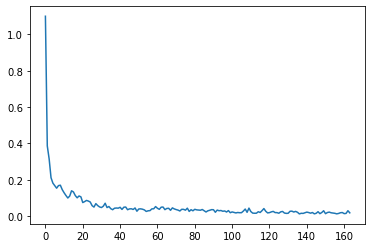

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)